Lecture 1
=========
## L-J potential

The LJ potential is defined as

$$
V(r)=4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$

Let us plot the LJ potential first

In [1]:
import numpy as np
import matplotlib.pyplot as plt

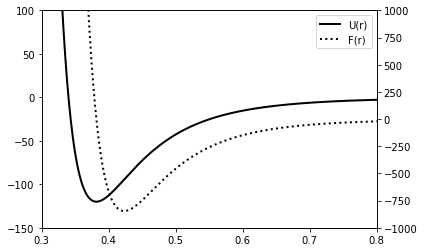

In [2]:
# Boltzmann's constant, J/K
kB = 1.381e-23

# The Lennard-Jones parameters:
A = 1.024e-23   # J.nm^6
B = 1.582e-26   # J.nm^12

# Adjust the units of A and B - they have more manageable values
# in K.nm^6 and K.nm^12
A, B = A / kB, B / kB

# Interatomic distance, in nm
r = np.linspace(0.3, 1, 1000)
# Interatomic potential
U = B/r**12 - A/r**6
# Interatomic force
F = 12*B/r**13 - 6*A/r**7

line1 = plt.plot(r, U, 'k', lw=2, label=r'U(r)')
plt.xlim(0.3, 0.8)
plt.ylim(-150, 100)

plt.twinx()
line2 = plt.plot(r, F, 'k', ls=':', lw=2, label=r'F(r)')
plt.xlim(0.3, 0.8)
plt.ylim(-1000, 1000)

# Jump through some hoops to get the both line's labels in the same legend:
lines = line1 + line2
labels = []
for line in lines:
    labels.append(line.get_label())
plt.legend(lines, labels)

plt.show()

```{admonition} Exercise 1
Use the code above as an example to plot energy of L-J potentials for He, Ne and Kr. Comment on the comparison.
```



## The MD run

Let us take a look at an example of a LJ potential to model the motion of an inert gas. You will be
able to play with the following code as a part of excersize for this lecture. The code uses ASE to
simulate Ar liquid at 94.4 K using LJ potential. 

> This example has a historical significance. Aneesur Rahman, considered as one of the pioneers of
 molecular dynamics, used similar methods modelling motion of atoms in liquid Argon. This paper is 
generally considered to mark the beginnings of the molecular dynamics method. You can access the 
original paper [here](https://journals.aps.org/pr/abstract/10.1103/PhysRev.136.A405).

In [3]:
from ase import Atoms, units
from ase.visualize import view
from ase.calculators.lj import LennardJones
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.md.langevin import Langevin
from ase.io.trajectory import Trajectory
from ase.optimize.minimahopping import MinimaHopping
from ase_notebook import AseView, ViewConfig, get_example_atoms
from ase.io import read, write, lammpsrun
from ase import units

Let us first define the simulation box geometry.

In [4]:
atoms=read('/home/al9001/Ar.xyz')
view(atoms, viewer='ngl')

Run a sample MD simulation.

In [5]:
atoms.calc = LennardJones(sigma=0.34,epsilon=1.657E-21,rc=3.4)
MaxwellBoltzmannDistribution(atoms, temp=0.00814)
T = 94.4  # Kelvin

dyn = Langevin(atoms, 0.1*units.fs, T*units.kB, 0.002)

def printenergy(a=atoms):  # store a reference to atoms in the definition.
    """Function to print the potential, kinetic and total energy."""
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    print('Energy per atom: Epot = %.3feV  Ekin = %.2feV (T=%3.0fK)  '
          'Etot = %.3feV' % (epot, ekin, ekin / (1.5 * units.kB), epot + ekin))


dyn.attach(printenergy, interval=50)

# We also want to save the positions of all atoms after every 100th time step.
traj = Trajectory('moldyn3.traj', 'w', atoms)
dyn.attach(traj.write, interval=50)

# Now run the dynamics
printenergy()
dyn.run(200)

Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 95K)  Etot = 0.012eV
Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 95K)  Etot = 0.012eV


Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 95K)  Etot = 0.012eV


Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 95K)  Etot = 0.012eV


Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 96K)  Etot = 0.012eV


Energy per atom: Epot = -0.000eV  Ekin = 0.01eV (T= 95K)  Etot = 0.012eV


True